In [2]:
import pandas as pd
import numpy as np
import sklearn as sk
import os
import sys
from sklearn.model_selection import train_test_split

In [3]:
sys.path.append('/home/alessia/Tirocinio/Fuzzy-C')

In [4]:
from FCM import *

# Setosa

In [5]:
dataset=pd.read_csv("Dataset/iris-setosa.csv")
X = dataset[["sepal_length", "sepal_width"]].values
y = dataset["species"].values
#print("features:\n", X, "\nLabels:\n ", y)

In [6]:
from sklearn.preprocessing import StandardScaler
iris_values_std = StandardScaler().fit_transform(X)

from sklearn.decomposition import PCA
pca_2d = PCA(n_components=2)
iris_values_2d = pca_2d.fit_transform(iris_values_std)
#print(iris_values_2d)

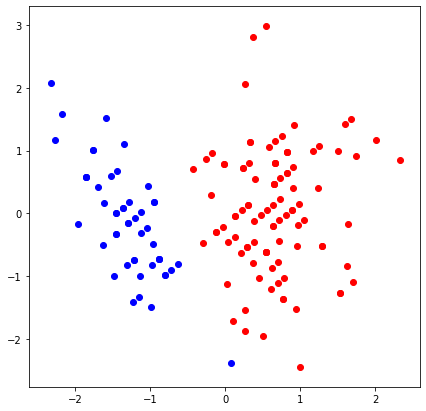

In [7]:
#stampa
%matplotlib inline
import matplotlib.pyplot as plt

def gr_dataset():
    plt.figure(figsize=(7,7))
    plt.xticks(np.arange(-4, 4, 1))
    for lab, col in zip((1, 0),
                        ('blue', 'red')):
        plt.scatter(iris_values_2d[y==lab, 0],
                    iris_values_2d[y==lab, 1],
                    label=lab,
                    c=col)

gr_dataset()

In [8]:
def gr_membership_contour(estimated_membership):
    x = np.arange(-4, 4, .1)
    y = np.arange(-4, 4, .1)
    X, Y = np.meshgrid(x, y)
    #print(Y)
    zs = np.array([estimated_membership(np.array(list(zip(np.ravel(x), np.ravel(y)))), 2, centers, 2)
                   for x,y in zip(np.ravel(X), np.ravel(Y))])
    zs1 = []
    zs2 = []
    for i in range(0, len(zs)):
        zs1.append(zs[i][0][0])
        zs2.append(zs[i][0][1])
    Z = np.array(zs1).reshape(X.shape)
    
    membership_contour = plt.contour(X, Y, Z,
                                     levels=(.1, .3, .5, .55, .6, .78, .95), colors='k')
    #print(membership_contour)
    plt.clabel(membership_contour, inline=1)

In [9]:
def generator(m):
    return (-4 + np.random.random(2*m) * 8).reshape((m, 2))

In [10]:
xTrain, xTest, yTrain, yTest = train_test_split(iris_values_2d,y, test_size=80)
model = FCM()

train_membership, centers = model.fuzzy_train(xTrain , 2 , 2)

<Figure size 504x504 with 0 Axes>

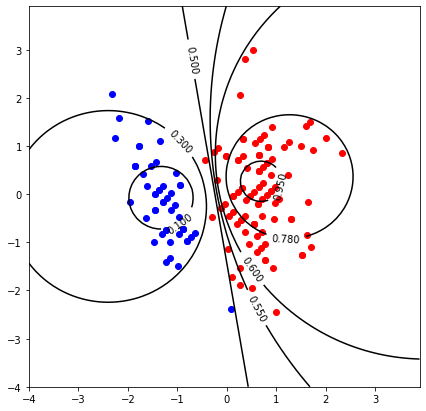

In [11]:
plt.figure(figsize=(7,7))
gr_dataset()
gr_membership_contour(model.fuzzy_predict)
plt.show()

In [25]:

#gr_dataset()
x = np.arange(-4, 4, .1)
y = np.arange(-4, 4, .1)
X, Y = np.meshgrid(x, y)
#print(Y)
zs = np.array([model.fuzzy_predict(np.array(list(zip(np.ravel(x), np.ravel(y)))), 2, centers, 2)
                   for x,y in zip(np.ravel(X), np.ravel(Y))])
zs1 = []
zs2 = []
for i in range(0, len(zs)):
    zs1.append(zs[i][0][0])
    zs2.append(zs[i][0][1])
Z = np.array(zs1).reshape(X.shape)

#plt.show()

IndexError: boolean index did not match indexed array along dimension 0; dimension is 150 but corresponding boolean dimension is 80

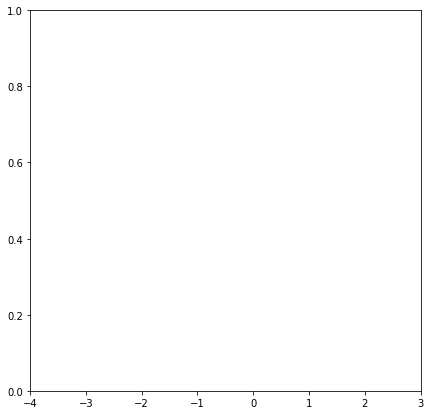

In [27]:
#plt.figure(figsize=(7,7))
#plt.xticks(np.arange(-4, 4, 1))
#plt.yticks(np.arange(-4, 4, 1))
#plt.xlim(4)
gr_dataset()
plt.imshow(Z)
plt.colorbar()
plt.gca().invert_yaxis()
plt.show()

# Versicolor

In [62]:
dataset=pd.read_csv("Dataset/iris-versicolor.csv")
X = dataset[["sepal_length", "sepal_width"]].values
y = dataset["species"].values
#print("features:\n", X, "\nLabels:\n ", y)

In [63]:
from sklearn.preprocessing import StandardScaler
iris_values_std = StandardScaler().fit_transform(X)

from sklearn.decomposition import PCA
pca_2d = PCA(n_components=2)
iris_values_2d = pca_2d.fit_transform(iris_values_std)
#print(iris_values_2d)

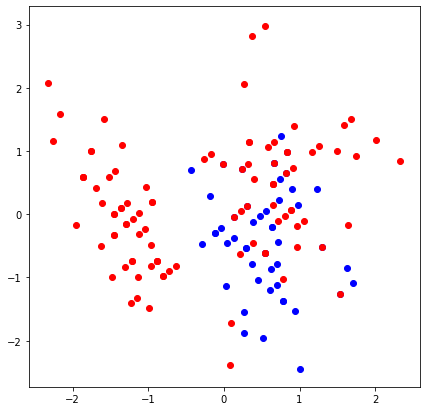

In [64]:
#stampa
%matplotlib inline
import matplotlib.pyplot as plt

def gr_dataset(): 
    plt.figure(figsize=(7,7))
    for lab, col in zip((1, 0),
                        ('blue', 'red')):
        plt.scatter(iris_values_2d[y==lab, 0],
                    iris_values_2d[y==lab, 1],
                    label=lab,
                    c=col)

gr_dataset()

<Figure size 504x504 with 0 Axes>

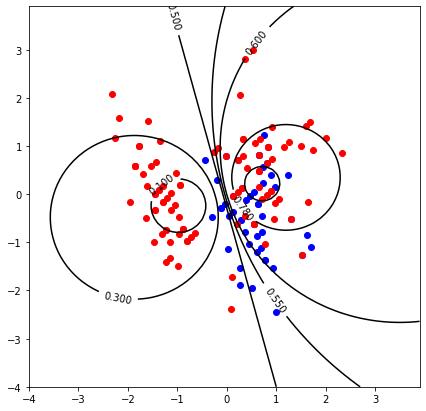

In [65]:
xTrain, xTest, yTrain, yTest = train_test_split(iris_values_2d,y, test_size=80)
model = FCM()

train_membership, centers = model.fuzzy_train(xTrain , 2 , 2)
plt.figure(figsize=(7,7))
gr_dataset()
gr_membership_contour(model.fuzzy_predict)
plt.show()


In [66]:

#gr_dataset()
x = np.arange(-4, 4, .1)
y = np.arange(-4, 4, .1)
X, Y = np.meshgrid(x, y)
#print(Y)
zs = np.array([model.fuzzy_predict(np.array(list(zip(np.ravel(x), np.ravel(y)))), 2, centers, 2)
                   for x,y in zip(np.ravel(X), np.ravel(Y))])
zs1 = []
zs2 = []
for i in range(0, len(zs)):
    zs1.append(zs[i][0][0])
    zs2.append(zs[i][0][1])
Z = np.array(zs1).reshape(X.shape)

normalized = (Z-Z.min())/(Z.max()-Z.min())
#gr_membership_contour(clf.predict)

#plt.show()

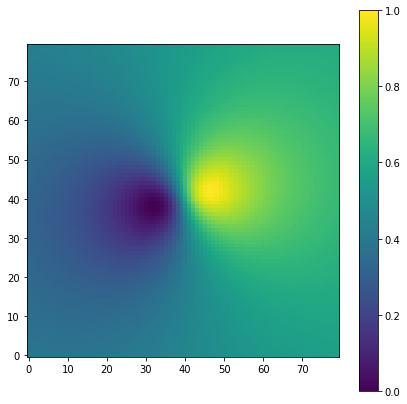

In [67]:
plt.figure(figsize=(7,7))
plt.imshow(normalized)
plt.colorbar()
plt.gca().invert_yaxis()
plt.show()

# Virginica

In [75]:
dataset=pd.read_csv("Dataset/iris-virginica.csv")
X = dataset[["petal_length", "petal_width"]].values
y = dataset["species"].values
#print("features:\n", X, "\nLabels:\n ", y)

In [76]:
from sklearn.preprocessing import StandardScaler
iris_values_std = StandardScaler().fit_transform(X)

from sklearn.decomposition import PCA
pca_2d = PCA(n_components=2)
iris_values_2d = pca_2d.fit_transform(iris_values_std)
#print(iris_values_2d)

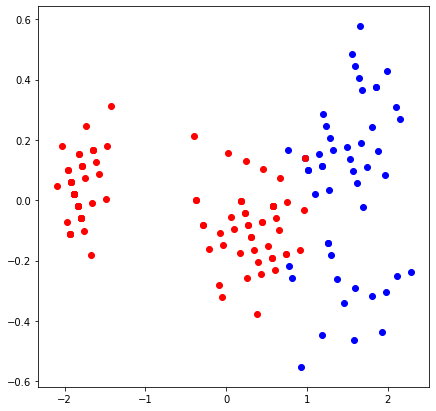

In [77]:
#stampa
%matplotlib inline
import matplotlib.pyplot as plt

def gr_dataset(): 
    plt.figure(figsize=(7,7))
    for lab, col in zip((1, 0),
                        ('blue', 'red')):
        plt.scatter(iris_values_2d[y==lab, 0],
                    iris_values_2d[y==lab, 1],
                    label=lab,
                    c=col)

gr_dataset()

<Figure size 504x504 with 0 Axes>

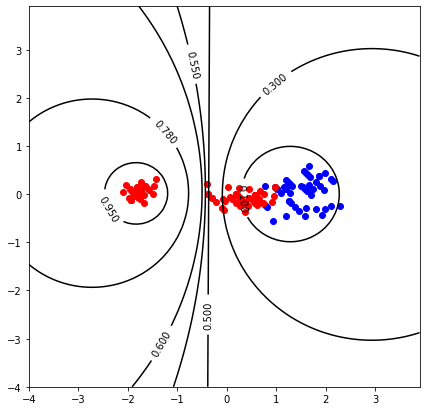

In [78]:
xTrain, xTest, yTrain, yTest = train_test_split(iris_values_2d,y, test_size=80)
model = FCM()

train_membership, centers = model.fuzzy_train(xTrain , 2 , 2)
plt.figure(figsize=(7,7))
gr_dataset()
gr_membership_contour(model.fuzzy_predict)
plt.show()


In [72]:

#gr_dataset()
x = np.arange(-4, 4, .1)
y = np.arange(-4, 4, .1)
X, Y = np.meshgrid(x, y)
#print(Y)
zs = np.array([model.fuzzy_predict(np.array(list(zip(np.ravel(x), np.ravel(y)))), 2, centers, 2)
                   for x,y in zip(np.ravel(X), np.ravel(Y))])
zs1 = []
zs2 = []
for i in range(0, len(zs)):
    zs1.append(zs[i][0][0])
    zs2.append(zs[i][0][1])
Z = np.array(zs1).reshape(X.shape)

normalized = (Z-Z.min())/(Z.max()-Z.min())
#gr_membership_contour(clf.predict)

#plt.show()

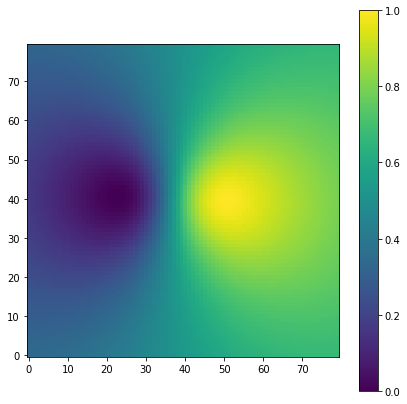

In [73]:
plt.figure(figsize=(7,7))
plt.imshow(normalized)
plt.colorbar()
plt.gca().invert_yaxis()
plt.show()